# Linearly Transformed Cosines

> 引擎相关代码：`Engine/Shaders/Private/RectLight.ush`

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sys.path.append('../project_viz')
from umath import LTC, spherical_plot

## Original Spherical Distributions

- Distributions:

$$
D_o(\omega_o(x_o, y_o, z_o))
$$

- These distributions blow are all **normalized**:

$$
\int_{\Omega} D_o(\omega_o) \mathrm{d} \omega_o = 1
$$

### Uniform Spherical Distribution

$$
D_o = \frac{1}{4 \pi}
$$

In [3]:
def do_uniform_sphere(w):
    return 1/(4*np.pi)

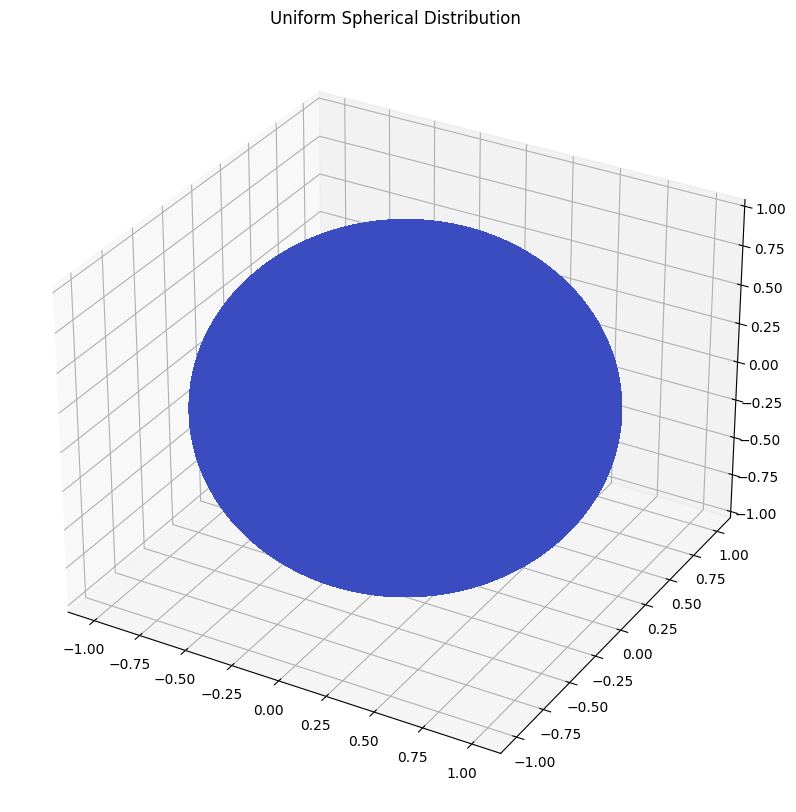

In [4]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1, projection='3d')
    
spherical_plot.heatmap(do_uniform_sphere, ax)

plt.title('Uniform Spherical Distribution')
plt.show()

### Uniform Hemispherical Distribution

$$
D_{o}(\omega_{o})=
\begin{cases}
\frac{1}{2 \pi} & \text { if } \quad z_o \geq 0 \\
0 & \text { if } \quad z_o<0
\end{cases}
$$

In [5]:
def do_uniform_hemisphere(w):
    if w[2]<0:
        return 0
    else:
        return 1 / (2*np.pi)

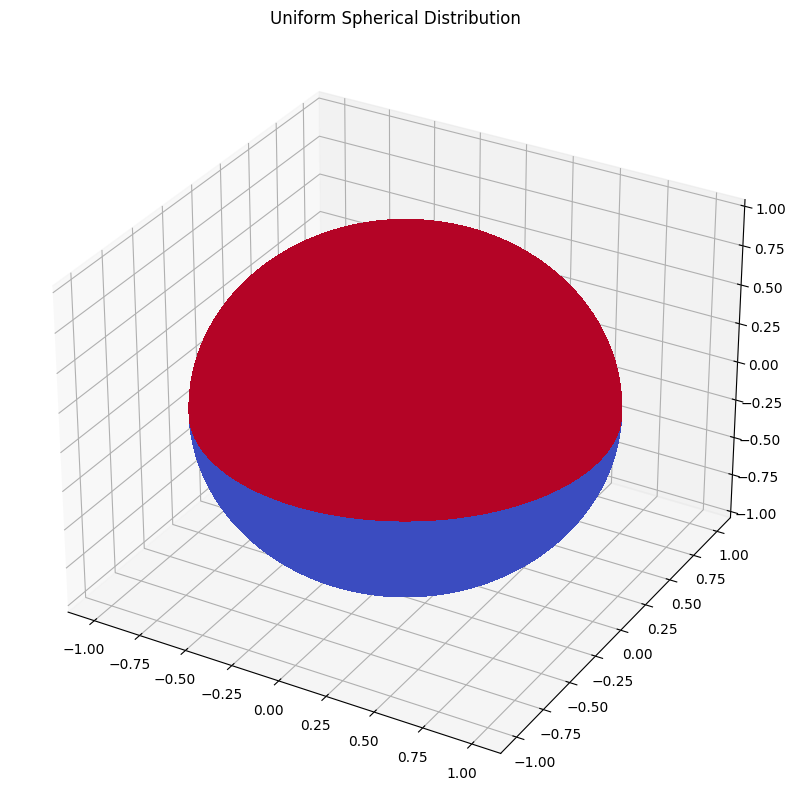

In [6]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1, projection='3d')

spherical_plot.heatmap(do_uniform_hemisphere, ax)

plt.title('Uniform Spherical Distribution')
plt.show()

### Clamped Cosine Distribution

$$
D_o(\omega_o)= 
\begin{cases}
\frac{z_o}{\pi} & \text{ if } \quad z_o \geq 0 \\ 
0 & \text{ if } \quad z_o<0
\end{cases}
$$


- 注：打眼一看，取 Z 值，然后归一化，和 Cosine 有啥关系？
    - 回想一下球面坐标的转换就明了了

$$
\begin{align}
x =& r \sin(\phi) \cos(\theta) \\
y =& r \sin(\phi) \sin(\theta) \\
z =& r \cos(\phi)
\end{align}
$$

In [7]:
def do_clamped_cosine(w):
    return np.maximum(0, w[2]/np.pi)

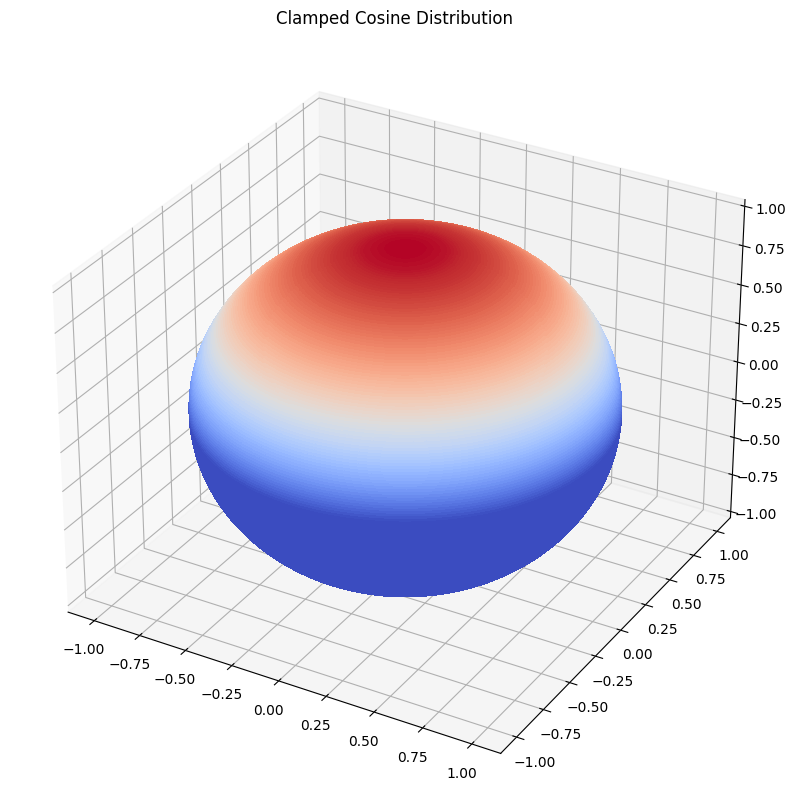

In [8]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1, projection='3d')

spherical_plot.heatmap(do_clamped_cosine, ax)

plt.title('Clamped Cosine Distribution')
plt.show()

### Squared Clamped Cosine Distribution

$$
D_o(\omega_o)= 
\begin{cases}
\frac{3 z_o^2}{2 \pi} & \text{ if } \quad z_o \geq 0 \\ 
0 & \text{ if } \quad z_o<0
\end{cases}
$$

In [9]:
def do_squared_clamped_cosine(w):
    return np.maximum(0, w[2]**2*3 / (2*np.pi))

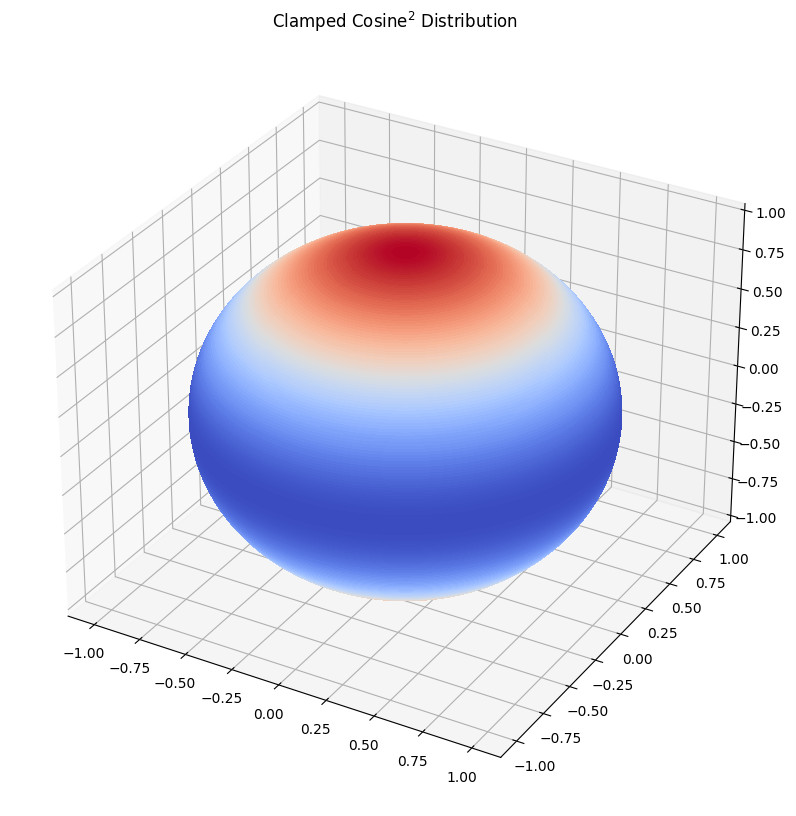

In [10]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1, projection='3d')

spherical_plot.heatmap(do_squared_clamped_cosine,ax)

plt.title('Clamped Cosine$^2$ Distribution')
plt.show()

## Linearly Transformed Distributions

$$
D(\omega) = D_{o}\left(\frac{M^{-1} \omega}{\left\|M^{-1} \omega\right\|}\right) \frac{\left|M^{-1}\right|}{\left\|M^{-1} \omega\right\|^{3}}
$$

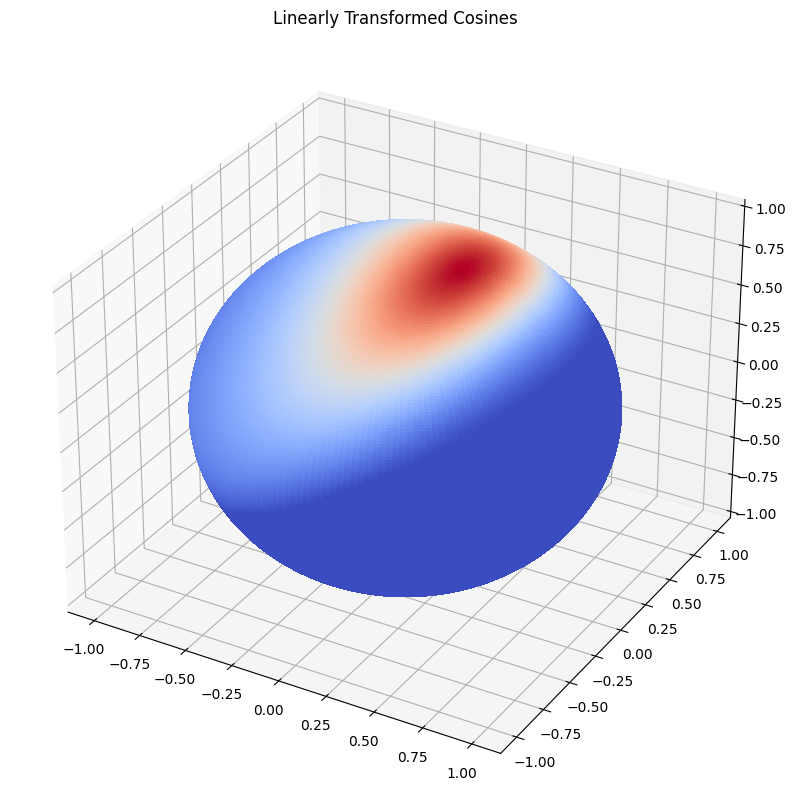

In [11]:
forward = np.array([0, 1, 0], dtype='float')
up = np.array([0, 0, 1], dtype='float')
scale = np.array([0.75, 1, 1], dtype='float')
skew = 0.5

ltc = LTC.LTC(forward, up, scale, skew)

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1, projection='3d')

spherical_plot.heatmap(lambda w: ltc.evaluate(w), ax)

plt.title('Linearly Transformed Cosines')
plt.show()

## BRDF Fitting

- TODO

## Reference

- [Real-Time Polygonal-Light Shading with Linearly Transformed Cosines](https://eheitzresearch.wordpress.com/415-2/)